# Non-Contextual Image Segmentation

These set of techniques basically focus on applying a conditional criterion on an image which split the image into two or more segments. The criterion works on one or more global values obtained from the image.

## Simple Thresholding

Let's look at a simple grayscale image to understand how we can apply image thresholding to segment it.

In [1]:
# importing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# reading image using opencv

image = cv2.imread('..//images//jaipur-1.jpg')
print('Image matrix shape {}'.format(image.shape))

Image matrix shape (3968, 3412, 3)


In [8]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print('Image matrix shape {}'.format(image_g.shape))

Image matrix shape (3968, 3412)


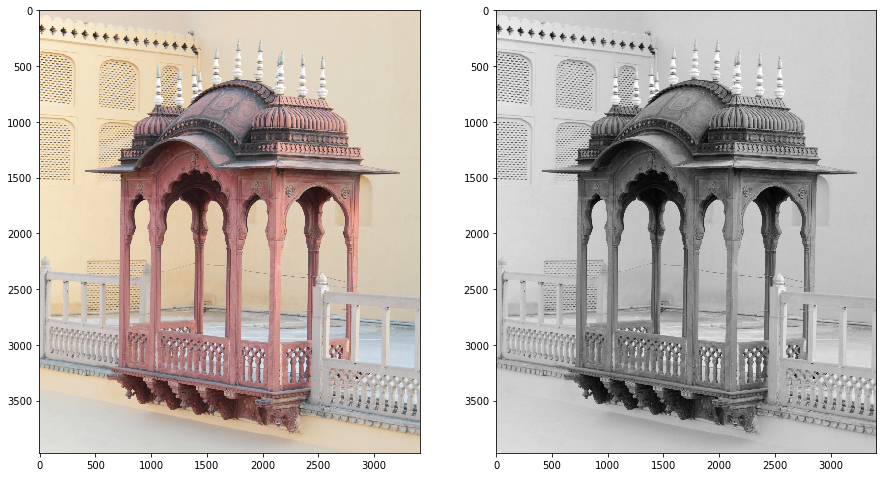

In [9]:
f, ax = plt.subplots(1, 2, figsize = (15, 10))
ax[0].imshow(image)
ax[1].imshow(image_g, cmap = 'gray')
plt.show()

In [18]:
# function to perform simple thresholding

def simple_thresholding1(img, thr):
    
    img_t = np.where(img >= thr, 255, 0)
    
    return img_t

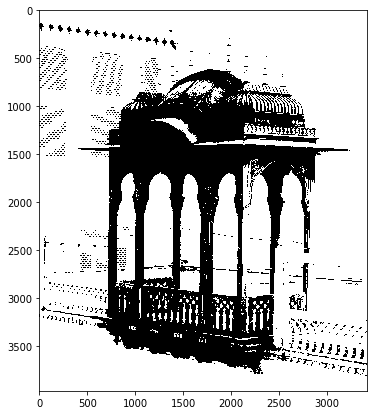

In [23]:
image_th1 = simple_thresholding1(image_g, 150)

f, ax = plt.subplots(1, 1, figsize = (7, 7))
plt.imshow(image_th1, cmap = 'gray')
plt.show()

In [40]:
# function to print histogram of an image

def image_hist(img):
    
    if len(img.shape) == 3:
        f, ax = plt.subplots(1, 3, figsize = (20, 5))
        ax[0].plot(cv2.calcHist([img[:, :, 0]],[0],None,[256],[0,256]), color = 'red')
        ax[1].plot(cv2.calcHist([img[:, :, 0]],[0],None,[256],[0,256]), color = 'green')
        ax[2].plot(cv2.calcHist([img[:, :, 0]],[0],None,[256],[0,256]), color = 'blue')
        plt.show()
    else:
        f, ax = plt.subplots(1, 1, figsize = (20, 5))
        ax.plot(cv2.calcHist([img[:, :]],[0],None,[256],[0,256]), color = 'black')
        plt.show()

# function to perform simple thresholding operation with two threshold values

def simple_thresholding2(img, thr1, thr2):
    
    img_t = np.where(img >= thr2, 255, np.where(img >= thr1, 125, 0))
    
    return img_t

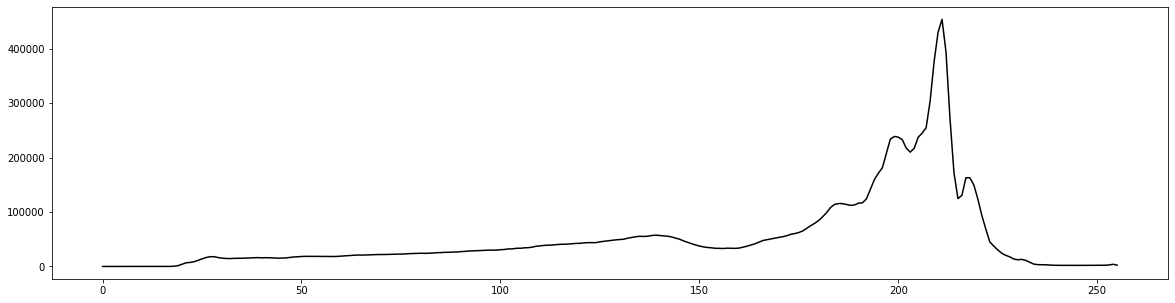

In [42]:
image_hist(image_g)

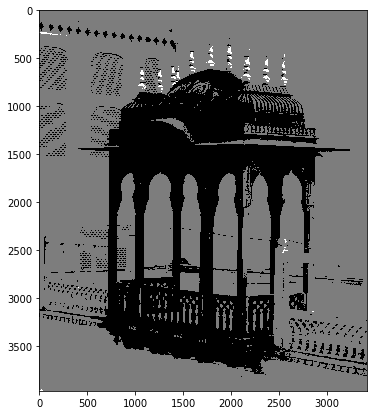

In [37]:
image_th1 = simple_thresholding2(image_g, 160, 235)
f, ax = plt.subplots(1, 1, figsize = (7, 7))
plt.imshow(image_th1, cmap = 'gray')
plt.show()

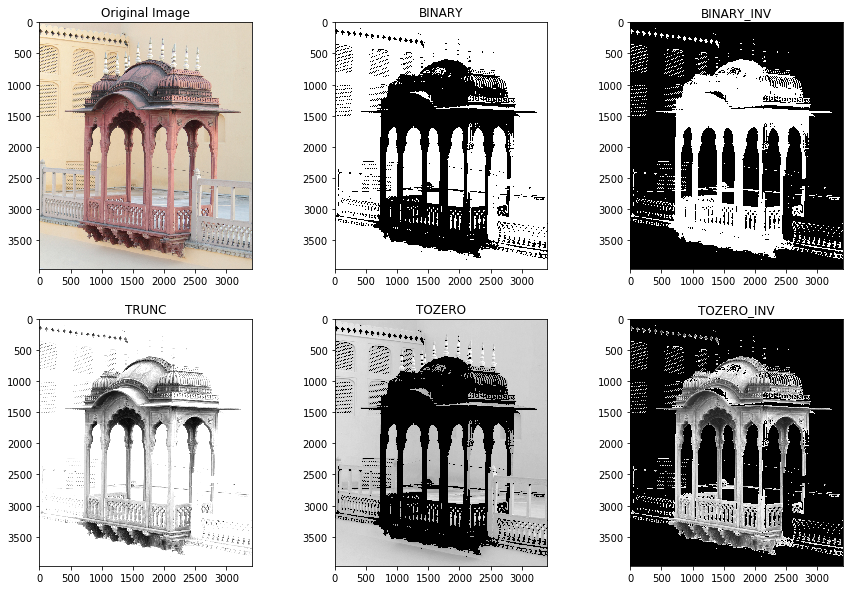

In [57]:
ret,thresh1 = cv2.threshold(image_g, 160, 235, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(image_g, 160, 235, cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(image_g, 160, 235, cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(image_g, 160, 235, cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(image_g, 160, 235, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]

f, ax = plt.subplots(2, 3, figsize = (15, 10))
for i in range(2):
    for j in range(3):
        ax[i][j].imshow(images[3*i+j],'gray')
        ax[i][j].set_title(titles[3*i+j])

plt.show()

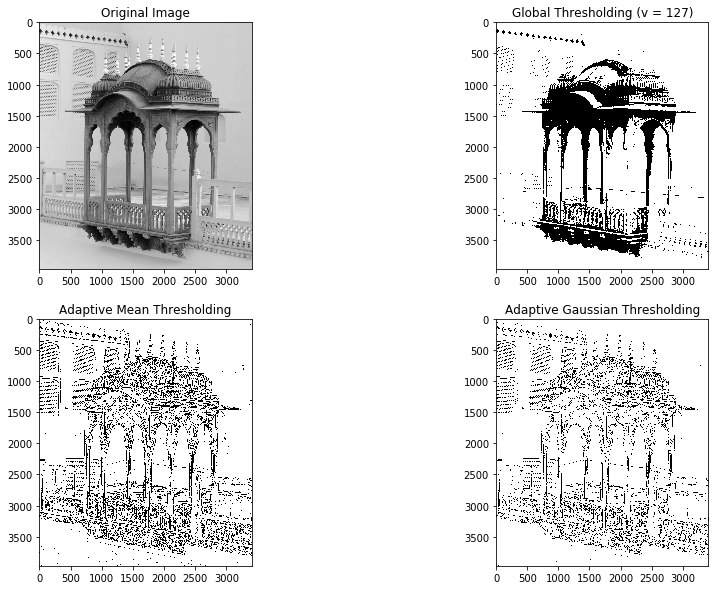

In [64]:
img = cv2.medianBlur(image_g,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

f, ax = plt.subplots(2, 2, figsize = (15, 10))
for i in range(2):
    for j in range(2):
        ax[i][j].imshow(images[2*i+j],'gray')
        ax[i][j].set_title(titles[2*i+j])

plt.show()

In [60]:
image.shape

(3968, 3412, 3)

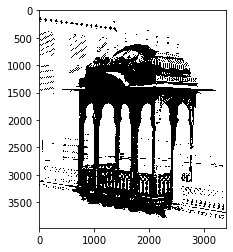

In [74]:
import matplotlib.pyplot as plt

# from skimage import data
from skimage.filters import threshold_otsu


# image = data.page()

global_thresh = threshold_otsu(image_g)
binary_global = np.where(image_g > global_thresh, 1, 0)

# block_size = 35
# # binary_adaptive = threshold_adaptive(image, block_size, offset=10)

# fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
# ax0, ax1, ax2 = axes
# plt.gray()

# ax0.imshow(image)
# ax0.set_title('Image')

plt.imshow(binary_global)
# ax1.set_title('Global thresholding')

# # ax2.imshow(binary_adaptive)
# # ax2.set_title('Adaptive thresholding')

# for ax in axes:
#     ax.axis('off')

# plt.show()